# Visualization
PySwarms implements tools for visualizing the behavior of your swarm. These are built on top of `matplotlib`, thus rendering charts that are easy to use and highly-customizable.

In this example, we will demonstrate three plotting methods available on PySwarms:
- `plot_cost_history`: for plotting the cost history of a swarm given a matrix
- `plot_contour`: for plotting swarm trajectories of a 2D-swarm in two-dimensional space
- `plot_surface`: for plotting swarm trajectories of a 2D-swarm in three-dimensional space

In [1]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

The first step is to create an optimizer. Here, we're going to use Global-best PSO to find the minima of a sphere function. As usual, we simply create an instance of its class `pyswarms.single.GlobalBestPSO` by passing the required parameters that we will use. Then, we'll call the `optimize()` method for 100 iterations.

In [2]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=100)

2020-05-23 19:32:48,244 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=1.54e-8
2020-05-23 19:32:48,613 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.536792835298679e-08, best pos: [-3.41927539e-05  1.19158650e-04]


## Plotting the cost history

To plot the cost history, we simply obtain the `cost_history` from the `optimizer` class and pass it to the `cost_history` function. Furthermore, this method also accepts a keyword argument `**kwargs` similar to `matplotlib`. This enables us to further customize various artists and elements in the plot. In addition, we can obtain the following histories from the same class:
- mean_neighbor_history: average local best history of all neighbors throughout optimization
- mean_pbest_history: average personal best of the particles throughout optimization

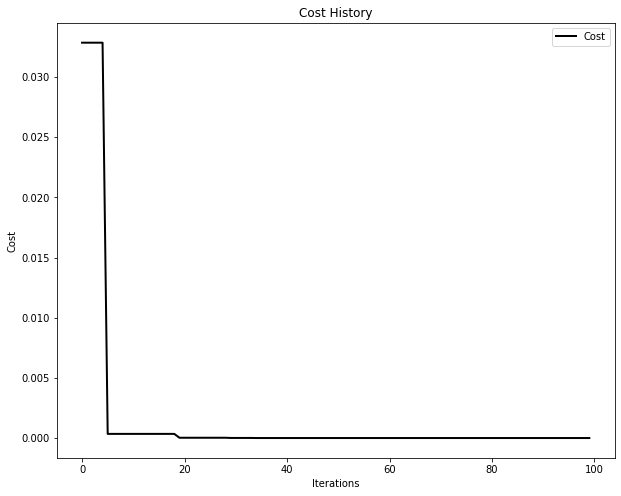

In [3]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

## Animating swarms
The `plotters` module offers two methods to perform animation, `plot_contour()` and `plot_surface()`. As its name suggests, these methods plot the particles in a 2-D or 3-D space.

Each animation method returns a `matplotlib.animation.Animation` class that still needs to be animated by a `Writer` class (thus necessitating the installation of a writer module). For the proceeding examples, we will convert the animations into a JS script. In such case, we need to invoke some extra methods to do just that.

Lastly, it would be nice to add meshes in our swarm to plot the sphere function. This enables us to visually recognize where the particles are with respect to our objective function. We can accomplish that using the `Mesher` class.

In [4]:
from pyswarms.utils.plotters.formatters import Mesher

In [5]:
# Initialize mesher with sphere function
m = Mesher(func=fx.sphere)

There are different formatters available in the `pyswarms.utils.plotters.formatters` module to customize your plots and visualizations. Aside from `Mesher`, there is a `Designer` class for customizing font sizes, figure sizes, etc. and an `Animator` class to set delays and repeats during animation.

### Plotting in 2-D space

We can obtain the swarm's position history using the `pos_history` attribute from the `optimizer` instance. To plot a 2D-contour, simply pass this together with the `Mesher` to the `plot_contour()` function. In addition, we can also mark the global minima of the sphere function, `(0,0)`, to visualize the swarm's "target".

### Plotting in 3-D space

To plot in 3D space, we need a position-fitness matrix with shape `(iterations, n_particles, 3)`. The first two columns indicate the x-y position of the particles, while the third column is the fitness of that given position. You need to set this up on your own, but we have provided a helper function  to compute this automatically

In [6]:
%%capture
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

In [9]:
# Enables us to view it in a Jupyter notebook
animation.save('plot0.gif', writer='imagemagick', fps=5)
Image(url='plot0.gif')
# if fails with MovieWriterRegistry Error: install imagemagick (apt install)

2020-05-23 20:01:35,999 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2020-05-23 20:01:36,002 - matplotlib.animation - INFO - MovieWriter._run: running command: convert -size 720x576 -depth 8 -delay 20.0 -loop 0 rgba:- plot0.gif


In [10]:
# Obtain a position-fitness matrix using the Mesher.compute_history_3d()
# method. It requires a cost history obtainable from the optimizer class
pos_history_3d = m.compute_history_3d(optimizer.pos_history)

In [11]:
# Make a designer and set the x,y,z limits to (-1,1), (-1,1) and (-0.1,1) respectively
from pyswarms.utils.plotters.formatters import Designer
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])

In [12]:
%%capture
# Make animation
animation3d = plot_surface(pos_history=pos_history_3d, # Use the cost_history we computed
                           mesher=m, designer=d,       # Customizations
                           mark=(0,0,0))               # Mark minima

In [21]:
!export MAGICK_MEMORY_LIMIT=4294967296


!identify -list resource

Resource limits:
  Width: 16KP
  Height: 16KP
  List length: 18.446744EP
  Area: 128MP
  Memory: 256MiB
  Map: 512MiB
  Disk: 1GiB
  File: 3072
  Thread: 8
  Throttle: 0
  Time: unlimited


In [18]:
animation3d.save('plot1.gif', writer='imagemagick', fps=10)
Image(url='plot1.gif')

2020-05-23 20:45:17,968 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2020-05-23 20:45:17,973 - matplotlib.animation - INFO - MovieWriter._run: running command: convert -size 720x576 -depth 8 -delay 10.0 -loop 0 rgba:- plot1.gif


In [19]:
!identify -list resource

Resource limits:
  Width: 16KP
  Height: 16KP
  List length: 18.446744EP
  Area: 128MP
  Memory: 256MiB
  Map: 512MiB
  Disk: 1GiB
  File: 3072
  Thread: 8
  Throttle: 0
  Time: unlimited
